# Learning PBE0/def2-TZVP atomization energies of molecules in QM7

In [1]:
from glob import glob

import numpy as np
import matplotlib.pyplot as plt

import krr

Define paths etc.

In [2]:
qm7_path = krr.qm7_path()
qm7_xyz_path = sorted(glob(f'{qm7_path}/xyz/*.xyz'))
qm7_energy_path = f'{qm7_path}/energies.txt'

Initialize the compound class which loads the molecules and calculates the coulomb matrix

In [3]:
qm7_mols = krr.Compound(qm7_xyz_path)

Retrieve representation (padded with zeros) and energies

In [4]:
representations = qm7_mols.get_representation()
labels = qm7_mols.get_labels(qm7_energy_path)

## Define hyperparameters
If sigma is None, it is calculated automatically during training such that all kernel values are
scaled between 1/2 and 1

In [5]:
# Hyperparameters
train_sigma = None # Determined during calculation
train_lambda = 1e-5
random_seed = 1337
learning_curve_subsets = [100, 200, 400, 800, 1000, 2000, 4971]

In [6]:
training_features, training_labels, testing_features, testing_labels = krr.split_data(representations,
                                                                                      labels, 
                                                                                      seed=random_seed, 
                                                                                      train_size=0.7)

## Training
Train a machine for every subset given and return the mean absolute error (MAE) for the test set

In [7]:
mae = krr.learning_curve(learning_curve_subsets, 
                     training_features, 
                     training_labels, 
                     testing_features, 
                     testing_labels,
                     train_sigma, 
                     train_lambda)

In [8]:
mae

[52.02420440033404,
 31.242186444602126,
 23.540724767519684,
 18.52261060140134,
 16.704726995737605,
 11.00932392947065,
 7.267158979459688]

## Learning Curve
If training was successfull and without any bugs, the MAE against the number of training 
samples should be linear on a log/log scale.

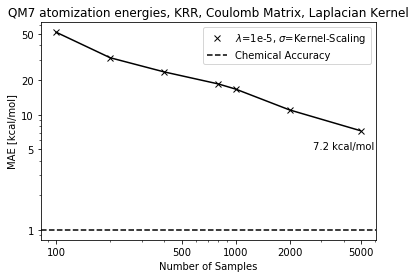

In [9]:
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots()
ax.plot(learning_curve_subsets, mae, 'kx', label='$\lambda$=1e-5, $\sigma$=Kernel-Scaling')
ax.plot(learning_curve_subsets, mae, 'k-')
ax.axhline(y=1, color='k', linestyle='--', label='Chemical Accuracy')
ax.annotate('7.2 kcal/mol', (2700, 5))
ax.loglog()
ax.xaxis.set_ticks([100, 500, 1000, 2000, 5000])
ax.yaxis.set_ticks([1, 5, 10, 20, 50])
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
plt.xlabel('Number of Samples')
plt.ylabel('MAE [kcal/mol]')
plt.legend()
plt.title('QM7 atomization energies, KRR, Coulomb Matrix, Laplacian Kernel')
plt.savefig('lrc_qm7_DLemm.png', format='png', dpi=1200)
plt.show()